## Jobs and Incomes vs Credit Card
Analysing: job position vs credit status, income vs credit status, and income vs job position  

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [90]:
# Read data 
data =  pd.read_csv('sample_dataset.csv')
data.head()

,Gender,Car,House,Children,Income($),Education,Age,Years Employed,Position,Record Month,Credit Status,Target
0,F,N,Y,Y,135000.0,Secondary / secondary special,35.0,9.8,Sales staff,1.0,<30 days overdue,0
1,F,N,Y,N,180000.0,Secondary / secondary special,54.0,6.6,Private service staff,10.0,Loan paid,0
2,F,Y,Y,Y,225000.0,Higher education,43.0,0.6,Laborers,2.0,Loan paid,0
3,M,Y,Y,N,360000.0,Higher education,48.0,5.8,Drivers,4.0,Loan paid,0
4,F,N,Y,N,202500.0,Secondary / secondary special,34.0,5.6,Laborers,28.0,<30 days overdue,0


In [91]:
#count different jobs to find top 8 
type_counts = data['Position'].value_counts()
print(type_counts)

Laborers                 12228
Core staff                7276
Sales staff               6589
Managers                  6336
Drivers                   4400
High skill tech staff     2872
Medicine staff            2501
Accountants               2455
Cooking staff             1259
Security staff            1170
Cleaning staff            1056
Private service staff      587
Low-skill Laborers         347
Secretaries                300
Waiters/barmen staff       212
HR staff                   176
IT staff                   122
Realty agents              114
Name: Position, dtype: int64


In [92]:
#data using only top 8 job positions 
top_positions = data[data['Position'].isin([
    'Laborers', 
    'Core staff', 
    'Sales staff', 
    'Managers', 
    'Drivers', 
    'High skill tech staff', 
    'Medicine staff'])]
top_positions.head()

,Gender,Car,House,Children,Income($),Education,Age,Years Employed,Position,Record Month,Credit Status,Target
0,F,N,Y,Y,135000.0,Secondary / secondary special,35.0,9.8,Sales staff,1.0,<30 days overdue,0
2,F,Y,Y,Y,225000.0,Higher education,43.0,0.6,Laborers,2.0,Loan paid,0
3,M,Y,Y,N,360000.0,Higher education,48.0,5.8,Drivers,4.0,Loan paid,0
4,F,N,Y,N,202500.0,Secondary / secondary special,34.0,5.6,Laborers,28.0,<30 days overdue,0
5,M,Y,Y,N,225000.0,Secondary / secondary special,31.0,6.1,Drivers,24.0,Loan paid,0


In [93]:
type_counts = top_positions['Position'].value_counts()
print(type_counts)

Laborers                 12228
Core staff                7276
Sales staff               6589
Managers                  6336
Drivers                   4400
High skill tech staff     2872
Medicine staff            2501
Name: Position, dtype: int64


In [94]:
total_count =  top_positions['Position'].count()
print(total_count)

42202


## What is the relationship between annual income and credit card payment status?

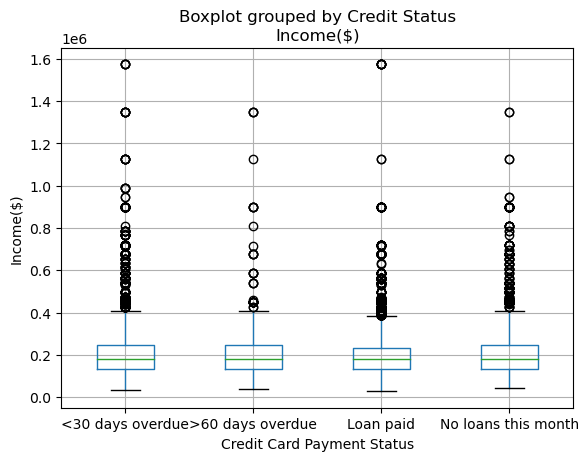

<Figure size 640x480 with 0 Axes>

In [95]:
#Box-Plot of card payment vs income 
top_positions.boxplot(by='Credit Status', column='Income($)')

plt.xlabel('Credit Card Payment Status')
plt.ylabel('Income($)')

#plot and save figure 
plt.show()
plt.savefig("income_credit.png")

In [124]:
#statistical analysis of credit status vs income
st_job_income = pd.crosstab(top_positions['Credit Status'],top_positions['Income($)'])

chi2, p, dof, expected = st.chi2_contingency(st_job_income)

print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)

#critical value calculation 
critical_value = st.chi2.ppf(1-.05, dof)
print('Critical value:', critical_value)

#Hypothesis interpretation 
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


Chi-square statistic: 1915.8076475849837
P-value: 9.538811367010588e-160
Degrees of freedom: 516
Critical value: 569.9528880530673
Reject the null hypothesis


## Does job type influence the likelihood of timely credit card payments?

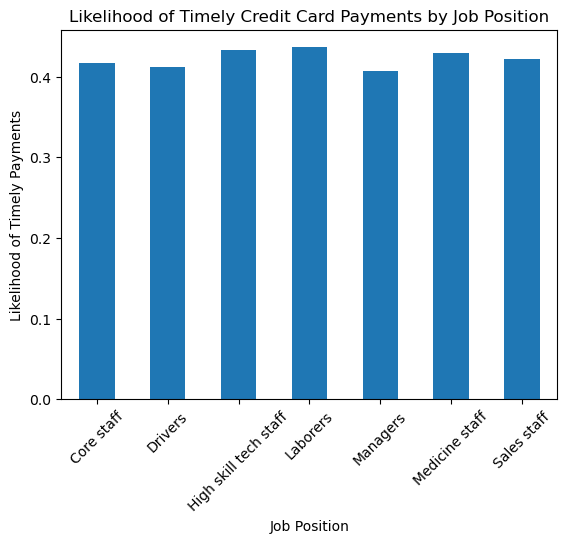

<Figure size 640x480 with 0 Axes>

In [118]:
#Job title vs payment 
grouped_data = top_positions.groupby(['Position','Credit Status']).size().unstack()
#percentage of loan paid 
timely_payment = grouped_data['Loan paid'] / grouped_data.sum(axis=1)

# Plot the likelihood of timely credit card payments by job position using a bar plot 
timely_payment.plot(kind='bar')
plt.title('Likelihood of Timely Credit Card Payments by Job Position')
plt.xlabel('Job Position')
plt.ylabel('Likelihood of Timely Payments')
plt.xticks(rotation=45)

#print and save figure 
plt.show()
plt.savefig("paid_job.png")

In [119]:
timely_payment

Position
Core staff               0.417537
Drivers                  0.412500
High skill tech staff    0.433844
Laborers                 0.436457
Managers                 0.407355
Medicine staff           0.429828
Sales staff              0.421764
dtype: float64

In [120]:
#statistical analysis of job type vs credit status

st_job_credit = pd.crosstab(top_positions['Position'], top_positions['Credit Status'])

chi2, p, dof, expected = st.chi2_contingency(st_job_credit)

print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)

#critical value calculation 
critical_value = st.chi2.ppf(1-.05, dof)
print('Critical value:', critical_value)

#Hypothesis interpretation 
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Chi-square statistic: 61.94555526515025
P-value: 9.88292888262165e-07
Degrees of freedom: 18
Critical value: 28.869299430392623
Reject the null hypothesis


## Job Position vs Income analysis 

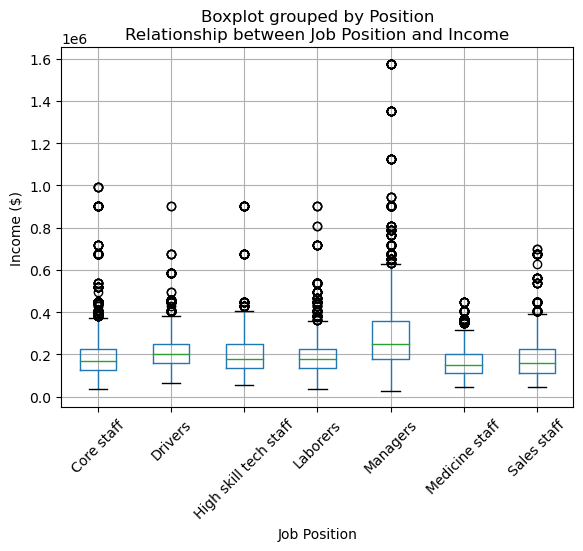

<Figure size 640x480 with 0 Axes>

In [121]:
# Plot the relationship between job position and income using a box plot 
top_positions.boxplot(by='Position', column='Income($)')

plt.xlabel('Job Position')
plt.ylabel('Income ($)')
plt.title('Relationship between Job Position and Income')
plt.xticks(rotation=45)

#print and save 
plt.show()
plt.savefig("income_job.png")

In [122]:
#statistical analysis of job type vs income
income_contengency = pd.crosstab(top_positions['Position'],top_positions['Income($)'])

chi2, p, dof, expected = st.chi2_contingency(income_contengency)

print('Chi-square statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)

#critical value calculation 
critical_value = st.chi2.ppf(1-.05, dof)
print('Critical value:', critical_value)

#Hypothesis interpretation 
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


Chi-square statistic: 16624.054930579598
P-value: 0.0
Degrees of freedom: 1032
Critical value: 1107.847420204076
Reject the null hypothesis
